In [2]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving datasets_1919_3310_flavors_of_cacao.csv to datasets_1919_3310_flavors_of_cacao.csv


Read the dataset into a Pandas DataFrame!

In [3]:
df=pd.read_csv('datasets_1919_3310_flavors_of_cacao.csv')
df

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


In [4]:
df.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


Does the dataset include any missing values? If so, delete the missing values entries!

In [5]:
df.isnull().sum().sum()

2

In [6]:
print(df[df.isna().any(axis=1)])

     Company \n(Maker-if known)  ...  Broad Bean\nOrigin
1072              Mast Brothers  ...                 NaN
1544                       Soma  ...  Ven, Bolivia, D.R.

[2 rows x 9 columns]


In [7]:
df1=df.dropna()
df1

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


How many tuples are there in the dataset?
How many unique company names are there in the dataset?
How many reviews are made in 2013 in the dataset?
In the BeanType Column, how many missing values are there?

In [8]:
len(df1.iloc[:,0].unique())

416

In [9]:
df1.iloc[:,3].value_counts()

2015    285
2014    247
2016    219
2012    194
2013    184
2011    164
2009    123
2010    111
2008     93
2007     77
2006     72
2017     24
Name: Review\nDate, dtype: int64

In [10]:
df.isnull().sum()

Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           1
Broad Bean\nOrigin                   1
dtype: int64

Visualize the ratings column with a histogram!
Comment on the resulting figure!

(array([  4.,  13.,  32., 140., 259., 644., 602.,  97.,   0.,   2.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

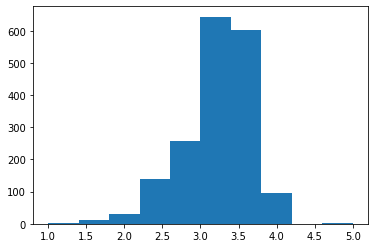

In [11]:
import matplotlib.pyplot as plt
plt.hist(df1.Rating)

Convert the Column Percent
Change the type of values in the column percent from string values to numerical values.
Visualize
Plot the converted numerical Cocoa Percent values against the Rating values!
From what you see, does more cocoa in a bar correspond to a higher rating?
Hint: Try a scatter plot with small alpha, e.g., 0.1, to flush out the density of each point.

In [21]:
df1.iloc[:,4] = df1.iloc[:,4].str.rstrip('%').astype(float)

AttributeError: ignored

In [22]:
df1

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70.0,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65.0,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65.0,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62.0,Austria,3.25,,India


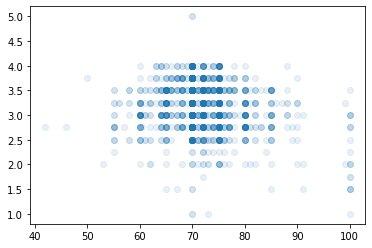

In [23]:
plt.scatter(df1.iloc[:,4], df1.Rating, alpha = 0.1)
plt.show()

Normalize the Ratings Column and print the results.

In [28]:
from sklearn import preprocessing

x = df1.Rating.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x1 = x.reshape(-1,1)
x_scaled = min_max_scaler.fit_transform(x1)
df2 = pd.DataFrame(x_scaled)
df2

,0
0,0.6875
1,0.4375
2,0.5000
3,0.6250
4,0.6250
...,...
1788,0.6875
1789,0.5000
1790,0.6250
1791,0.5625


Challenge yourself (Optional)
List the companies ordered by their average score (averaged over each company’s reviews).

In [36]:
df1.groupby(df1.iloc[:,0]).mean().sort_values(by=['Rating'])

,REF,Review\nDate,Cocoa\nPercent,Rating
Company (Maker-if known),,,,
Cote d' Or (Kraft),48.000000,2006.000000,70.000000,1.000000
Machu Picchu Trading Co.,636.500000,2010.500000,62.500000,1.875000
Callebaut,218.500000,2007.500000,65.000000,1.875000
Love Bar,1502.000000,2015.000000,75.000000,2.000000
Jacque Torres,5.000000,2006.000000,71.000000,2.000000
...,...,...,...,...
Matale,1178.000000,2013.000000,71.000000,3.812500
Amedei,180.076923,2007.230769,69.538462,3.846154
Ocelot,1558.000000,2015.000000,72.500000,3.875000


Suppose we are interested in the company’s names and locations for some collective analysis. Encode the two categorical columns with the encoder you think is best for the job!

In [38]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df1.iloc[:,0] = encoder.fit_transform(df1.iloc[:,0])
encoder1 = LabelEncoder()
df1.iloc[:,5] = encoder.fit_transform(df1.iloc[:,5])
df1

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,0,Agua Grande,1876,2016,63.0,18,3.75,,Sao Tome
1,0,Kpime,1676,2015,70.0,18,2.75,,Togo
2,0,Atsane,1676,2015,70.0,18,3.00,,Togo
3,0,Akata,1680,2015,70.0,18,3.50,,Togo
4,0,Quilla,1704,2015,70.0,18,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,410,Peru,647,2011,70.0,3,3.75,,Peru
1791,410,Congo,749,2011,65.0,3,3.00,Forastero,Congo
1792,410,Kerala State,749,2011,65.0,3,3.50,Forastero,India
1793,410,Kerala State,781,2011,62.0,3,3.25,,India
